### 1. Load Libraries

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)


In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import collections
import re
from ast import literal_eval
import itertools
import string
from functools import reduce
from datetime import datetime
import pickle

import lightgbm as lgb

from scipy import stats
from scipy.stats import pearsonr
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor

# from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### 2. Load Data

In [2]:
train = pd.read_csv("train.csv", delimiter=',')
test = pd.read_csv("test.csv", delimiter=',')

### 3. Data Statistics Analysis

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train.isna().sum()


id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [5]:
test.isna().sum()


id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

Text(0.5, 1.0, 'Số lượng dữ liệu thiếu')

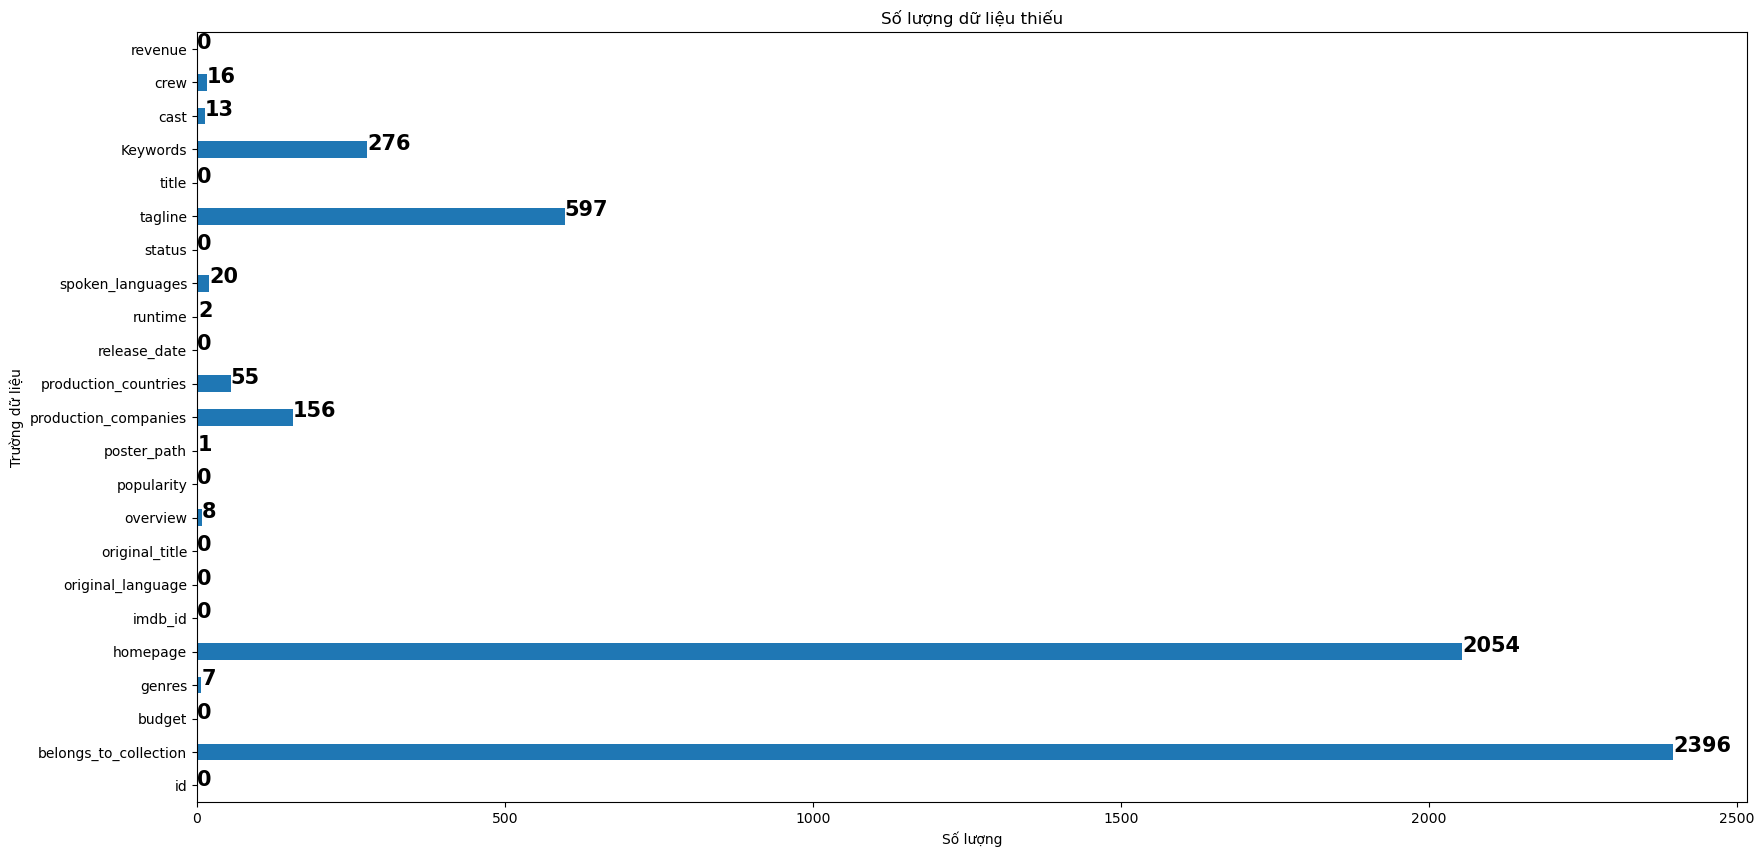

In [6]:
train.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(train.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Số lượng")
plt.ylabel("Trường dữ liệu")
plt.title("Số lượng dữ liệu thiếu")

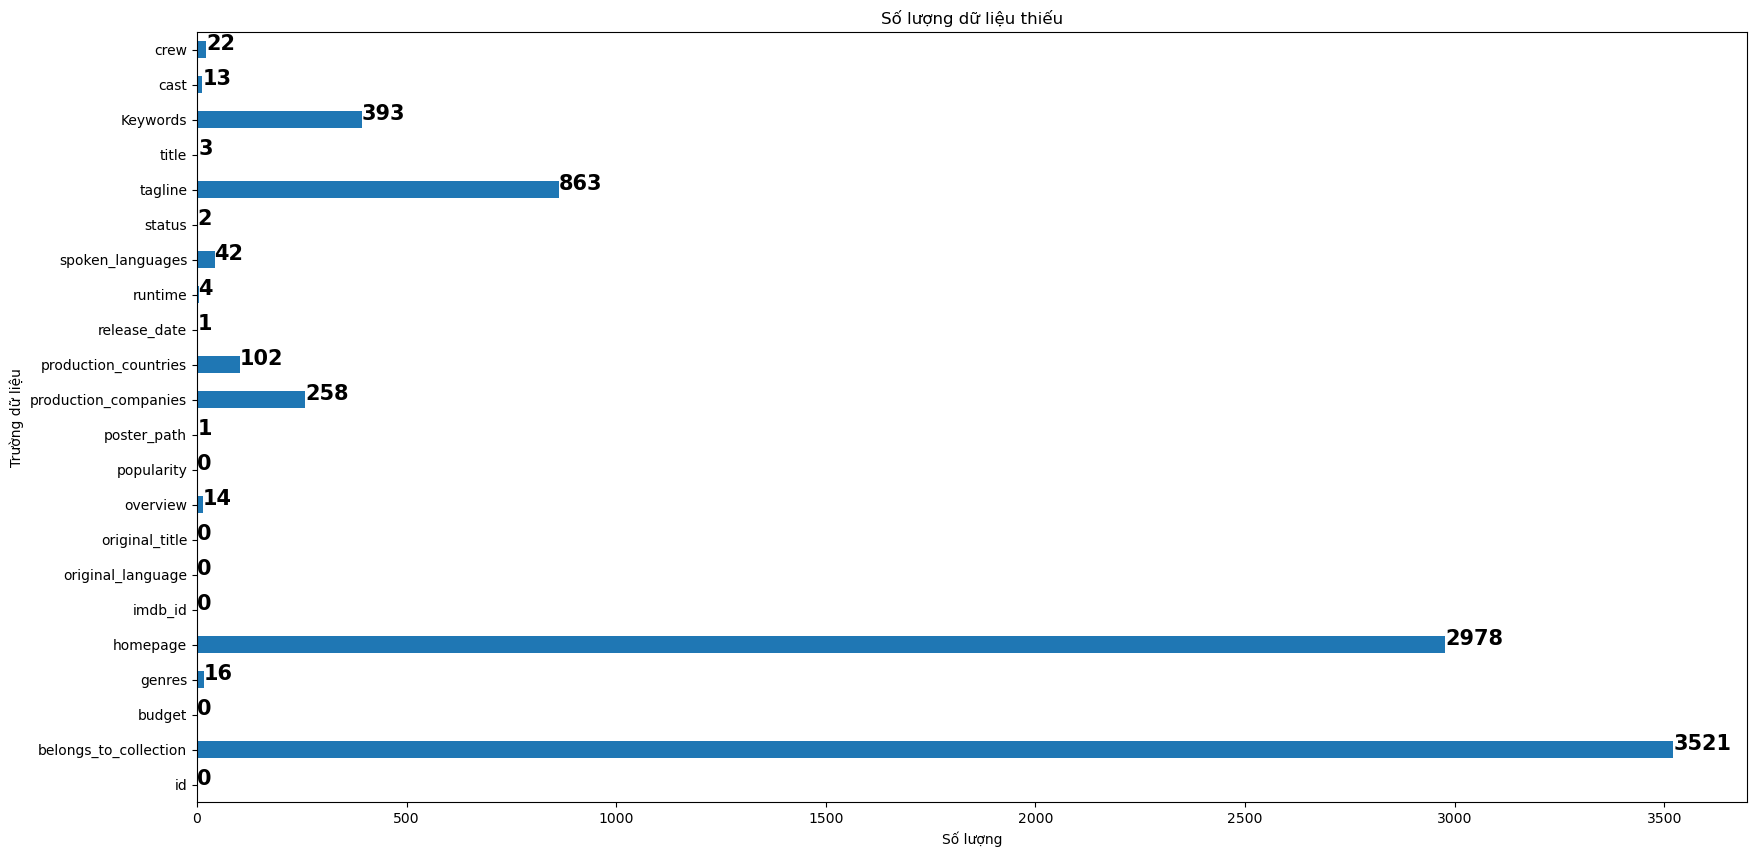

In [7]:
plt.figure()
test.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(test.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Số lượng")
plt.ylabel("Trường dữ liệu")
plt.title("Số lượng dữ liệu thiếu")
plt.show()

In [8]:
train.dropna(subset=['crew', 'cast','production_companies'], inplace=True)
test.dropna(subset=['crew', 'cast','production_companies'], inplace=True)

Text(0.5, 1.0, 'Số lượng dữ liệu thiếu')

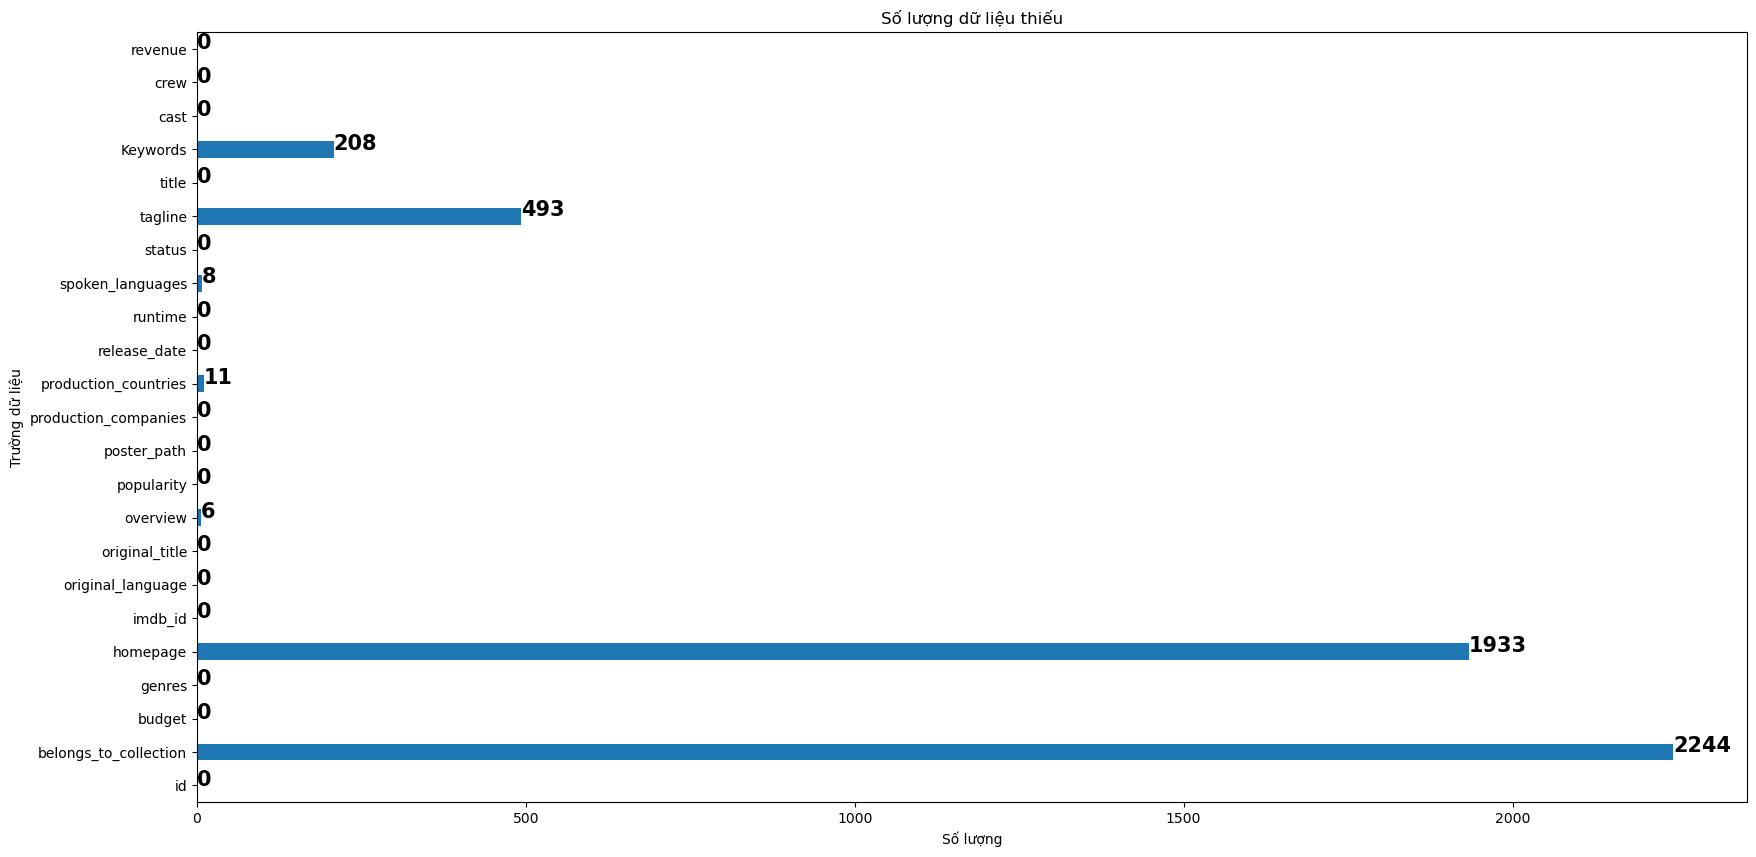

In [9]:
train.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(train.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Số lượng")
plt.ylabel("Trường dữ liệu")
plt.title("Số lượng dữ liệu thiếu")

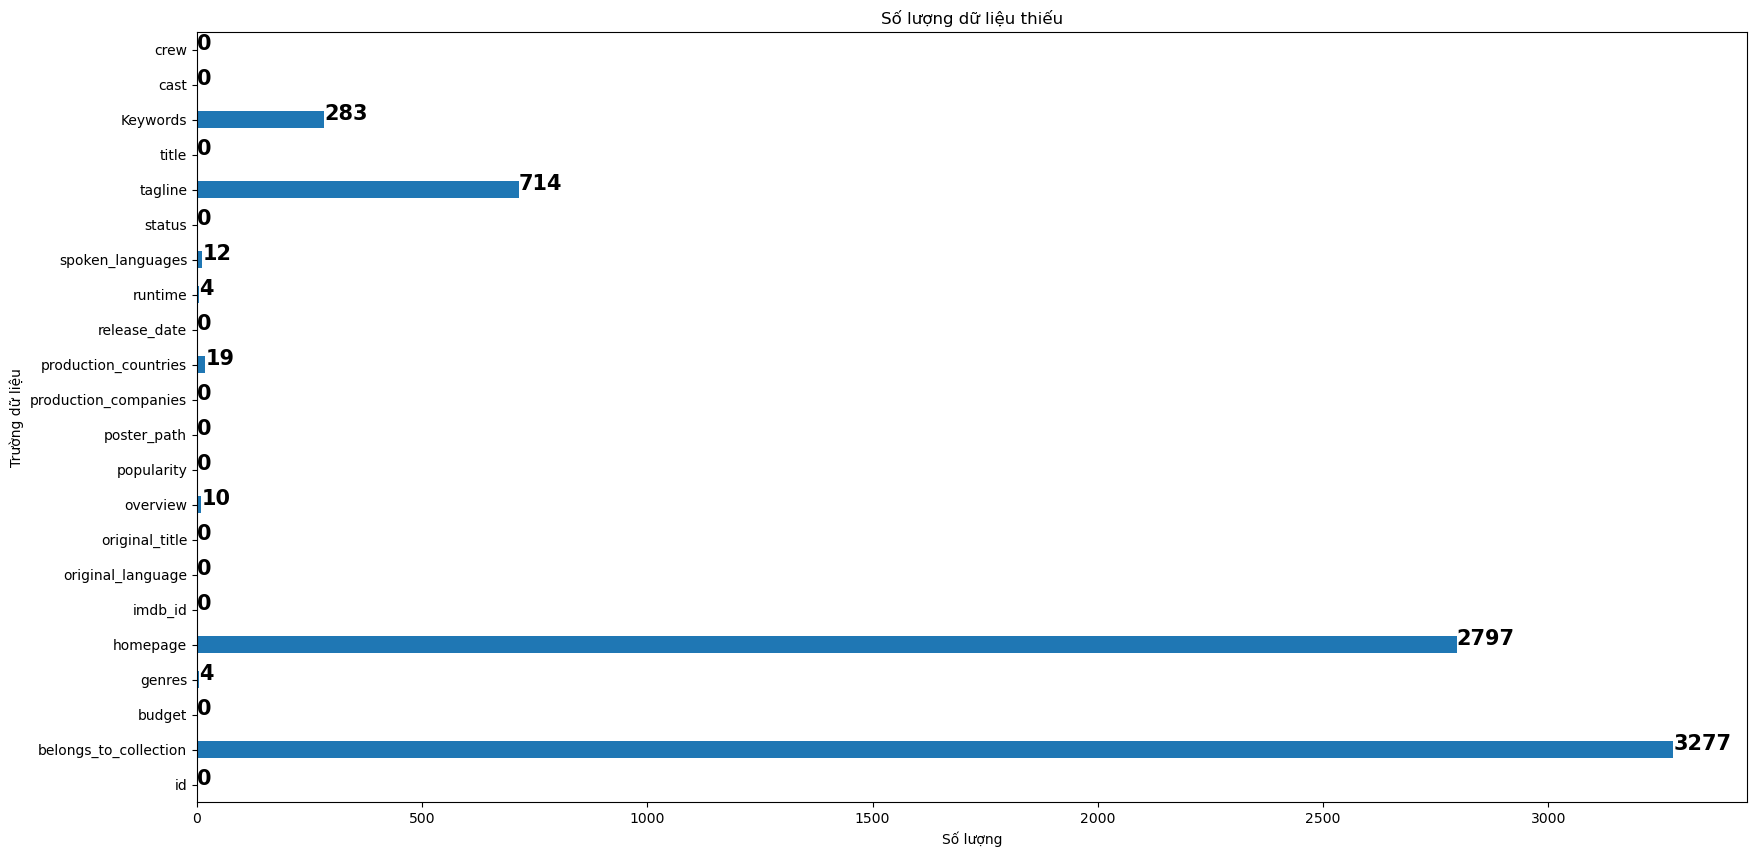

In [10]:
plt.figure()
test.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(test.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Số lượng")
plt.ylabel("Trường dữ liệu")
plt.title("Số lượng dữ liệu thiếu")
plt.show()

In [11]:
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

In [12]:

# Update 'train' DataFrame
train.loc[train['id'] == 391, 'runtime'] = 86
train.loc[train['id'] == 592, 'runtime'] = 90
train.loc[train['id'] == 925, 'runtime'] = 95
train.loc[train['id'] == 978, 'runtime'] = 93
train.loc[train['id'] == 1256, 'runtime'] = 92
train.loc[train['id'] == 1542, 'runtime'] = 93
train.loc[train['id'] == 1875, 'runtime'] = 86
train.loc[train['id'] == 2151, 'runtime'] = 108
train.loc[train['id'] == 2499, 'runtime'] = 108
train.loc[train['id'] == 2646, 'runtime'] = 98
train.loc[train['id'] == 2786, 'runtime'] = 111
train.loc[train['id'] == 2866, 'runtime'] = 96

# Update 'test' DataFrame
test.loc[test['id'] == 4074, 'runtime'] = 103
test.loc[test['id'] == 4222, 'runtime'] = 93
test.loc[test['id'] == 4431, 'runtime'] = 100
test.loc[test['id'] == 5520, 'runtime'] = 86
test.loc[test['id'] == 5845, 'runtime'] = 83
test.loc[test['id'] == 5849, 'runtime'] = 140
test.loc[test['id'] == 6210, 'runtime'] = 104
test.loc[test['id'] == 6804, 'runtime'] = 145
test.loc[test['id'] == 7321, 'runtime'] = 87


In [13]:
movie = train.id[train.budget > 1000][train.revenue < 100]

for k in movie :
    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000

In [14]:
na_headers = ['belongs_to_collection', 'genres', 'spoken_languages', 'production_companies', 'production_countries', 'Keywords', 'cast', 'crew']


In [15]:
# define function to convert string format into json/dict format
def text_to_dict(data, cols):

    for column in cols:
        data[column] = data[column].apply(lambda x: {} if pd.isna(x) else literal_eval(x))
    return data

# converting all applicable columns to their literal data formats
train = text_to_dict(train, na_headers)
test = text_to_dict(test, na_headers)



In [16]:
def list_breakdown(data, header):

    all_list = {}
    all_list = {i['name'] for row in data[header] for i in row if row != {}}
    
    return sorted(all_list)
                       

In [17]:
# create lists with all possible data points for the 8 dictionary variables
all_keywords = list_breakdown(train, 'Keywords')
all_cast = list_breakdown(train, 'cast')
all_crew = list_breakdown(train, 'crew')
all_lang = list_breakdown(train, 'spoken_languages')
all_product_comp = list_breakdown(train, 'production_companies')
all_product_count = list_breakdown(train, 'production_countries')
all_genres = list_breakdown(train, 'genres')
all_collections = list_breakdown(train, 'belongs_to_collection')

In [18]:
all_product_comp

['"DIA" Productions GmbH & Co. KG',
 '1000 Volt',
 '1019 Entertainment',
 '10th Hole Productions',
 '120 Films',
 '120dB Films',
 '13 Productions',
 '1492 Pictures',
 '1818',
 '19 Entertainment',
 '1984 Private Defense Contractors',
 '2 Bridges Productions',
 '2 Entertain',
 '2 Loop Films',
 '20th Century Fox Home Entertainment',
 '20th Century Fox Television',
 '21 Laps Entertainment',
 '21st Century Film Corporation',
 '22h22',
 '24P Media Group',
 '26 Films',
 '27 Films Production',
 '2929 Productions',
 '2DUX²',
 '2T Produzione Film',
 '3 Art Entertainment',
 '3 Arts Entertainment',
 '3311 Productions',
 '33andOut Productions',
 '34th Street Films',
 '360 Pictures',
 '391 Productions',
 '3B Productions',
 '3L Filmproduktion GmbH',
 '3ality Digital Entertainment',
 '4 Kids Entertainment',
 '40 Acres & A Mule Filmworks',
 '42',
 '42 Km Film',
 '4Kids Entertainment',
 '4M',
 '5150 Action',
 '60/80 Productions',
 '80 Days Productions',
 '8383 Productions',
 '87Eleven',
 'A Bad Way Ltd'

In [19]:
train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
6,7,{},14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,{},"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,{},0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,{},0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,{},65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","

In [20]:
# replace dictionaries by lists with only names for all variables in na_headers
na_headers = pd.Series(na_headers)

def formatting_dict_vars(dataset, headers):
    # create temporary columns
    temp_names = list(map(lambda x: x+'_temp', headers))
    for header in temp_names:
        dataset[header] = 0
    
    # transform dicts into lists containing only the names
    j = 0
    for org_header in headers:
        dataset[temp_names[j]] = dataset[org_header].apply(lambda x: ','.join([i['name'] for i in x]) if x != {} else '')
        j += 1
        
    return dataset

train = formatting_dict_vars(train, na_headers)
test = formatting_dict_vars(test, na_headers)

In [21]:
train['belongs_to_collection'][0]

[{'id': 313576,
  'name': 'Hot Tub Time Machine Collection',
  'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg',
  'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]

In [22]:
train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,belongs_to_collection_temp,genres_temp,spoken_languages_temp,production_companies_temp,production_countries_temp,Keywords_temp,cast_temp,crew_temp
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,Comedy,English,"Paramount Pictures,United Artists,Metro-Goldwy...",United States of America,"time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","Kelly Cantley,Steve Pink,Josh Heald,Josh Heald..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,"Comedy,Drama,Family,Romance",English,Walt Disney Pictures,United States of America,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","Garry Marshall,Charles Minsky,John Debney,Whit..."
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,,Drama,English,"Bold Films,Blumhouse Productions,Right of Way ...",United States of America,"jazz,obsession,conservatory,music teacher,new ...","Miles Teller,J.K. Simmons,Melissa Benoist,Aust...","Terri Taylor,Richard Henderson,Jeffrey Stott,H..."
6,7,{},14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,"[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,,"Horror,Thriller",English,"Ghost House Pictures,North Box Productions","United States of America,Canada",,"Jeffrey Dean Morgan,Natasha Calis,Madison Dave...","Sam Raimi,Nancy Nayor,Anders Villadsen,Eric L...."
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,"[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,The Muppet Collection,"Action,Comedy,Music,Family,Adventure",English,"Walt Disney Pictures,Jim Henson Productions,Ji...",United States of America,"island,pirate gang,puppet,treasure hunt","Tim Curry,Kevin Bishop,Jennifer Saunders,Billy...","Brian Henson,Frank Oz,Brian Henson,Jerry Juhl,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,{},0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,"[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,,"Comedy,Romance",English,"Warner Bros.,Morgan Creek Productions",United States of America,"prison,sex,handcuffs,waitress,fight,fireworks,...","Tom Berenger,William McNamara,–≠—Ä–∏–∫–∞ –≠–ª–...","Dennis Hopper,Joe Batteer,John Rice,Joe Battee..."
2996,2997,{},0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,"[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,,"Drama,Music",svenska,"Memfis Film,Film i Väst","Denmark,Sweden","sweden,punk,based on comic,all girl band,girl ...","Mira Barkhammar,Mira Grosin,Liv LeMoyne,David ...","Imor Hermann,Anna Anthony,Lukas Moodysson,Luka..."
2997,2998,{},65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Saman

### 4. Data preparation

In [23]:
# count the number of possible returns per variable
def total_count(data, header, topk=30):
    '''
    Function to return the topk results and the number of their occurence in the data set
    Args: data = dataframe
          header = string; column header
          topk = int; default is 30; amount of top results to be displayed
    Returns: total =  list of dictionaries
    '''
    every_mention = list(i['name'] for row in data[header] for i in row if row != {})
    total = collections.Counter(every_mention).most_common(topk)
    return total


In [24]:
def len_var(df, col):
    '''
    Function to create new column containing number of values 
    in respective row of specified column
    Args: df = dataframe
          col = str; column header
    Returns: df = dataframe
    '''
    df['number_'+col] = df[col].apply(lambda x: len(x))

    return df


def add_top_30(dataset, col, topk):
    '''
    Function to add top 30 results from column headers as separate columns to 
    dataframe
    Args: dataset = dataframe 
          col = string; column name
          topk = list; top k values in column
    Returns: dataset = dataframe
    '''
    counter = 0
    for item in topk:
        header_name = str(item[0])+'_name'
        dataset[header_name] = dataset[col+'_temp'].apply(lambda x: 1 if item[0] in x else 0)

    return dataset


def clean(df, headers, list_top_30=[], train_set=True):
    '''
    Function to clean a dataframe
    Args: df = dataframe
          headers = list containing names of column headers that need 
                    to be converted from strings to dicts
          list_top_30 = list; default value is empty list; otherwise it can hold
                        list with lists of top 30 results from specific columns
          train = boolean; True by default; designates whether the dataframe is
                  a test or train dataset
    Returns: cleaned_df = cleaned dataframe
             total_top_k_var = list of top 30 results from particular columns
    '''
    
    # convert string format to variables in dict
    df = text_to_dict(df, headers)
    
    # convert data in dicts to list of strings
    df = formatting_dict_vars(df, headers)
    
    # dropping rows with 0s in budget column
    df = df[df['budget'] != 0]
    # drop rows with null values in numeric variables
    df = df.dropna(axis=0, how='any', subset=['release_date'])
    # dealing with missing values
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    most_common_genres = df['genres'].describe()['top']
    df['genres'] = df['genres'].apply(lambda x: most_common_genres if x == {} else x)
    
    # one-hot encode genres
    one_hot = df['genres_temp'].str.get_dummies(sep=',')

    df = df.join(one_hot)
    
    # add year
    df['release_year'] = df['release_date'].map(lambda x: str(19) + x[-2:] if int(x[-2:]) > 17 else str(20) + x[-2:])
    df['release_year'] = df['release_year'].astype('int32')
    # add month
    df['release_month'] = df['release_date'].map(lambda x: int(x[:2]) if x[1] != '/' else int(x[:1]))
    # add week
    df['release_week'] = df['release_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').isocalendar()[1])
    # add weekday
    df['release_weekday'] = df['release_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').strftime('%A'))

    # one-hot encode month variables
    one_hot_month = pd.get_dummies(df['release_month'], prefix='month')
    # one-hot-encode weekday variable
    one_hot_weekday = pd.get_dummies(df['release_weekday'], prefix='weekday')
    
    df = df.join(one_hot_month)
    df = df.join(one_hot_weekday)

    # add column with 1 if movie belongs to any collection and 0 if it does not belong to any collection
    df['collection'] = df['belongs_to_collection'].apply(lambda x: 1 if x != {} else 0)

    # add column for number of production companies
    df = len_var(df, 'production_companies')        
    # add column for number of production countries
    df = len_var(df, 'production_countries')
    # add column for revenue depending on number of languages
    df = len_var(df, 'spoken_languages')
    
    # Add column for existence of tag line
    df['tagline_exists'] = df['tagline'].apply(lambda x: 1 if x != 0 else 0)

    # Add column for length of tag line
    df['tagline'].fillna(0, inplace=True)
    df['tagline_length'] = df['tagline'].apply(lambda x: len(x) if x != 0 else 0)
    
    # Add column for length of title
    df['title'].fillna(0, inplace=True)
    df['title_length'] = df['title'].apply(lambda x: len(x) if x != 0 else 0)
    
    # add budget-year-ratio
    df['release_year'] = df['release_year'].astype('int32')
    df['budget_year_ratio'] = round(df['budget']/df['release_year'], 2)
    
    # add top thirty values as columns for below features
    top_30_vars = ['cast', 'crew', 'Keywords', 'production_companies', 'production_countries']
    if train_set:
        for var in top_30_vars:
            top_k_var = total_count(df, var)
            list_top_30.append(top_k_var)
            cleaned_df = add_top_30(df, var, top_k_var)
    else:
        for i in range(len(top_30_vars)):
            cleaned_df = add_top_30(df, top_30_vars[i], list_top_30[i])
    
    col_list = ['belongs_to_collection', 'belongs_to_collection_temp', 'genres', 'genres_temp', 'spoken_languages', 
                'spoken_languages_temp', 'production_companies', 'production_companies_temp', 'production_countries', 
                'production_countries_temp', 'Keywords', 'Keywords_temp', 'cast', 'cast_temp', 'crew', 'crew_temp', 'homepage', 
                'original_language', 'original_title', 'status', 'poster_path', 'release_date', 'release_month',
                'release_weekday', 'id', 'imdb_id', 'overview', 'tagline']
    
    for item in col_list:
        cleaned_df.drop(item, axis=1, inplace=True)
    
    # Reset the index so I will be able to match the revenue, title and budget to the rows later on
    cleaned_df = cleaned_df.reset_index()
    
    return cleaned_df, list_top_30
    

In [25]:
import warnings
warnings.filterwarnings('ignore')
headers = ['belongs_to_collection', 'genres', 'spoken_languages', 'production_companies', 'production_countries', 'Keywords', 'cast', 'crew']
train = pd.read_csv("train.csv", delimiter=',')
test = pd.read_csv("test.csv", delimiter=',')
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 15800000       # All at once
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
train.loc[train['id'] == 391, 'runtime'] = 86
train.loc[train['id'] == 592, 'runtime'] = 90
train.loc[train['id'] == 925, 'runtime'] = 95
train.loc[train['id'] == 978, 'runtime'] = 93
train.loc[train['id'] == 1256, 'runtime'] = 92
train.loc[train['id'] == 1542, 'runtime'] = 93
train.loc[train['id'] == 1875, 'runtime'] = 86
train.loc[train['id'] == 2151, 'runtime'] = 108
train.loc[train['id'] == 2499, 'runtime'] = 108
train.loc[train['id'] == 2646, 'runtime'] = 98
train.loc[train['id'] == 2786, 'runtime'] = 111
train.loc[train['id'] == 2866, 'runtime'] = 96

# Update 'test' DataFrame
test.loc[test['id'] == 4074, 'runtime'] = 103
test.loc[test['id'] == 4222, 'runtime'] = 93
test.loc[test['id'] == 4431, 'runtime'] = 100
test.loc[test['id'] == 5520, 'runtime'] = 86
test.loc[test['id'] == 5845, 'runtime'] = 83
test.loc[test['id'] == 5849, 'runtime'] = 140
test.loc[test['id'] == 6210, 'runtime'] = 104
test.loc[test['id'] == 6804, 'runtime'] = 145
test.loc[test['id'] == 7321, 'runtime'] = 87
movie = train.id[train.budget > 1000][train.revenue < 100]

for k in movie :
    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000
df_train, list_top_30 = clean(train, headers)
df_test, _ = clean(test, headers, list_top_30=list_top_30, train_set=False)

In [26]:
df_train

,index,budget,popularity,runtime,title,revenue,Action,Adventure,Animation,Comedy,...,Sweden_name,South Africa_name,Hungary_name,United Arab Emirates_name,Austria_name,Luxembourg_name,Greece_name,Finland_name,Romania_name,Switzerland_name
0,0,14000000,6.575393,93.0,Hot Tub Time Machine 2,12314651,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,40000000,8.248895,113.0,The Princess Diaries 2: Royal Engagement,95149435,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,3300000,64.299990,105.0,Whiplash,13092000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200000,3.174936,122.0,Kahaani,16000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,8000000,0.743274,83.0,Pinocchio and the Emperor of the Night,3261638,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,2992,1135654,3.878515,149.0,The Thief of Bagdad,1213880,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2199,2993,60000000,14.092373,128.0,The Terminal,219417255,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2200,2997,65000000,14.482345,120.0,The Long Kiss Goodnight,89456761,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2201,2998,42000000,15.725542,90.0,Along Came Polly,171963386,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import torch
# import sys
# !{sys.executable} -m pip install torch_geometric
print("torch version: ", torch.__version__)
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt


torch version:  2.3.0+cpu


In [28]:
# df_train = df_train.reset_index()  


movie_features = df_train[['budget', 'popularity', 'runtime', 'revenue', 
                   'number_production_companies', 'number_production_countries', 
                   'number_spoken_languages', 'tagline_length', 'title_length', 
                   'budget_year_ratio']]

genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 
                  'History', 'Horror', 'Music', 'Mystery', 'Romance', 
                  'Science Fiction', 'Thriller', 'War', 'Western'] 

people_columns = [col for col in df_train.columns if "_name" in col] 

theme_columns = ['murder_name', 'independent film_name', 'based on novel_name', 
                 'violence_name', 'dystopia_name', 'aftercreditsstinger_name', 
                 'sport_name', 'revenge_name', 'biography_name', 'sequel_name',
                 'suspense_name', 'friendship_name', 'police_name', 'sex_name',
                 'love_name', 'teenager_name', 'los angeles_name', 'nudity_name',
                 'prison_name', 'female nudity_name', 'new york_name', 
                 'father son relationship_name', '3d_name', 'drug_name', 
                 'musical_name', 'high school_name', 'based on comic_name', 
                 'wedding_name']

company_columns = ['Warner Bros._name', 'Universal Pictures_name', 
                    'Paramount Pictures_name', 
                    'Twentieth Century Fox Film Corporation_name', 
                    'Columbia Pictures_name', 'New Line Cinema_name', 
                    'Metro-Goldwyn-Mayer (MGM)_name', 'Walt Disney Pictures_name',
                    'Touchstone Pictures_name', 'Columbia Pictures Corporation_name', 
                    'Relativity Media_name', 'TriStar Pictures_name', 
                    'United Artists_name', 'Village Roadshow Pictures_name', 
                    'Miramax Films_name', 'Canal+_name', 'Regency Enterprises_name', 
                    'Dune Entertainment_name', 'DreamWorks SKG_name', 
                    'Lionsgate_name', 'Summit Entertainment_name', 
                    'Fox Searchlight Pictures_name', 'Fox 2000 Pictures_name', 
                    'Working Title Films_name', 'Original Film_name', 
                    'Epsilon Motion Pictures_name', 'StudioCanal_name', 
                    'Castle Rock Entertainment_name', 'Legendary Pictures_name', 
                    'Morgan Creek Productions_name']

country_columns = ['United States of America_name', 'United Kingdom_name', 
                   'France_name', 'Germany_name', 'Canada_name', 'India_name',
                   'Australia_name', 'Italy_name', 'Russia_name', 'Japan_name',
                   'China_name', 'Spain_name', 'Hong Kong_name', 'Belgium_name', 
                   'Ireland_name', 'New Zealand_name', 'Czech Republic_name', 
                   'South Korea_name', 'Netherlands_name', 'Mexico_name', 
                   'Sweden_name', 'South Africa_name', 'Hungary_name', 
                   'United Arab Emirates_name', 'Austria_name', 'Luxembourg_name', 
                   'Greece_name', 'Finland_name', 'Romania_name', 
                   'Switzerland_name']

release_columns = ['release_year', 'release_week', 'month_1', 'month_2', 'month_3',
                   'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 
                   'month_9', 'month_10', 'month_11', 'month_12', 
                   'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 
                   'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 
                   'weekday_Wednesday'] 
for col in release_columns:
    print(f"{col}: {df_train[col].dtype}")
    df_train[col] = df_train[col].astype(int)
release_features = torch.tensor(df_train[release_columns].values, dtype=torch.float)
# 2. Create Feature Tensors
movie_features = torch.tensor(movie_features.values, dtype=torch.float)
genre_features = torch.tensor(df_train[genre_columns].values, dtype=torch.float)
people_features = torch.tensor(df_train[people_columns].values, dtype=torch.float)
theme_features = torch.tensor(df_train[theme_columns].values, dtype=torch.float)
company_features = torch.tensor(df_train[company_columns].values, dtype=torch.float)
country_features = torch.tensor(df_train[country_columns].values, dtype=torch.float)
release_features = torch.tensor(df_train[release_columns].values, dtype=torch.float)

# ... Create tensors for other feature categories similarly

# 3. Create Edge Index and NetworkX Graph Simultaneously
edge_index = []
G = nx.Graph() 

for i, row in df_train.iterrows():
    movie_node_id = i 
    G.add_node(movie_node_id, label=row['title']) # Add movie node with title

    # Connect Movie to Genres
    for j, genre in enumerate(genre_columns):
        if row[genre] == 1:
            genre_node_id = len(df_train) + j 
            edge_index.append([movie_node_id, genre_node_id])
            G.add_node(genre_node_id, label=genre) # Add genre node
            G.add_edge(movie_node_id, genre_node_id)
            print(f"Creating edge: Movie {movie_node_id} - Genre {genre} ({genre_node_id})") 

    # Connect Movie to People
    for j, person in enumerate(people_columns):
        if row[person] == 1:
            person_node_id = len(df_train) + len(genre_columns) + j
            edge_index.append([movie_node_id, person_node_id])
            G.add_node(person_node_id, label=person[:-5])  # Remove "_name" for label
            G.add_edge(movie_node_id, person_node_id)
            print(f"Creating edge: Movie {movie_node_id} - people {person} ({person_node_id})") 

    # Connect Movie to Themes
    for j, theme in enumerate(theme_columns):
        if row[theme] == 1:
            theme_node_id = len(df_train) + len(genre_columns) + len(people_columns) + j
            edge_index.append([movie_node_id, theme_node_id])
            G.add_node(theme_node_id, label=theme[:-5])  # Remove "_name" for label
            G.add_edge(movie_node_id, theme_node_id)

    # Connect Movie to Companies
    for j, company in enumerate(company_columns):
        if row[company] == 1:
            company_node_id = len(df_train) + len(genre_columns) + len(people_columns) + len(theme_columns) + j
            edge_index.append([movie_node_id, company_node_id])
            G.add_node(company_node_id, label=company[:-5])  # Remove "_name" for label
            G.add_edge(movie_node_id, company_node_id)

    # Connect Movie to Countries
    for j, country in enumerate(country_columns):
        if row[country] == 1:
            country_node_id = len(df_train) + len(genre_columns) + len(people_columns) + len(theme_columns) + len(company_columns) + j
            edge_index.append([movie_node_id, country_node_id])
            G.add_node(country_node_id, label=country[:-5])  # Remove "_name" for label
            G.add_edge(movie_node_id, country_node_id)


    # Connect Movie to Release Information
    for j, release in enumerate(release_columns):
        if row[release] == 1:
            release_node_id = len(df_train) + len(genre_columns) + len(people_columns) + len(theme_columns) + len(company_columns) + len(country_columns) + j
            edge_index.append([movie_node_id, release_node_id])
            G.add_node(release_node_id, label=release)  
            G.add_edge(movie_node_id, release_node_id)



edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# 4. Concatenate Features and Create Data Object for GNN
all_features = torch.cat([movie_features, genre_features, people_features, theme_features, company_features, country_features, release_features
                          # ... concatenate other feature tensors
                          ], dim=1) 

data = Data(x=all_features, 
            edge_index=edge_index, 
            y=torch.tensor(df_train['revenue'].values, dtype=torch.float))

# 5. Visualize Subgraph 
import networkx as nx
import matplotlib.pyplot as plt

def visualize_subgraph(data, movie_id, hops=1):
    # Create the graph from edge_index
    G = nx.Graph()
    edge_index = data.edge_index.numpy()
    for i in range(edge_index.shape[1]):  # edge_index.shape[1] gives the number of edges
        src = edge_index[0, i]
        dst = edge_index[1, i]
        G.add_edge(src, dst)
    
    # Find nodes within 'hops' distance from the movie_id
    subgraph_nodes = set([movie_id])
    for _ in range(hops):
        current_nodes = set()
        for node in subgraph_nodes:
            current_nodes.update(G.neighbors(node))
        subgraph_nodes.update(current_nodes)
    
    # Create subgraph
    subG = G.subgraph(subgraph_nodes)
    
    # Draw the graph
    pos = nx.spring_layout(subG)  # positions for all nodes
    nx.draw(subG, pos, with_labels=True, node_color='lightblue', edge_color='#9099A2', node_size=500, font_size=12)
    plt.title(f"Subgraph Visualization for Movie ID {movie_id}")
    plt.show()





release_year: int32
release_week: int64
month_1: bool
month_2: bool
month_3: bool
month_4: bool
month_5: bool
month_6: bool
month_7: bool
month_8: bool
month_9: bool
month_10: bool
month_11: bool
month_12: bool
weekday_Friday: bool
weekday_Monday: bool
weekday_Saturday: bool
weekday_Sunday: bool
weekday_Thursday: bool
weekday_Tuesday: bool
weekday_Wednesday: bool
Creating edge: Movie 0 - Genre Comedy (2206)
Creating edge: Movie 0 - people duringcreditsstinger_name (2282)
Creating edge: Movie 0 - people sequel_name (2293)
Creating edge: Movie 0 - people Paramount Pictures_name (2314)
Creating edge: Movie 0 - people Metro-Goldwyn-Mayer (MGM)_name (2318)
Creating edge: Movie 0 - people United Artists_name (2324)
Creating edge: Movie 0 - people United States of America_name (2342)
Creating edge: Movie 1 - Genre Comedy (2206)
Creating edge: Movie 1 - Genre Drama (2209)
Creating edge: Movie 1 - Genre Family (2210)
Creating edge: Movie 1 - Genre Romance (2217)
Creating edge: Movie 1 - people 

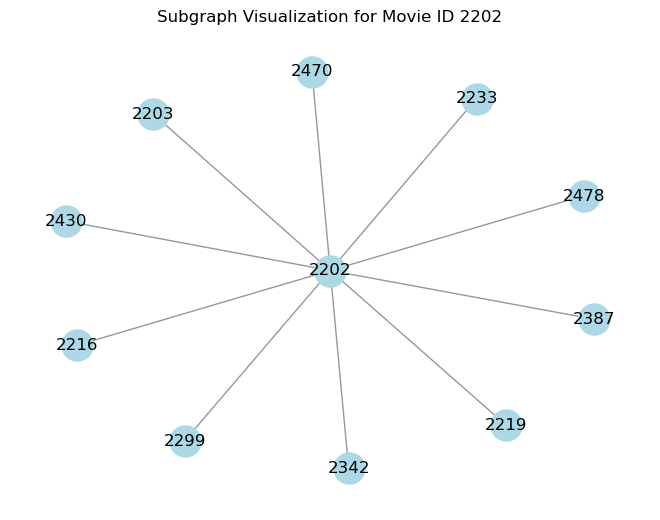

In [29]:
movie_id_to_visualize = 2202
visualize_subgraph(data, movie_id=movie_id_to_visualize, hops=1)

In [33]:
max_index = edge_index.max().item()
num_features = movie_features.shape[0]

print(f'Max node index: {max_index}')
print(f'Number of feature rows: {num_features}')

if max_index >= num_features:
    print("Error: There are more nodes referenced in edge_index than features available.")
else:
    print("Node references are consistent with available features.")


Max node index: 2480
Number of feature rows: 2203
Error: There are more nodes referenced in edge_index than features available.


In [34]:
import torch
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv
from torch_geometric.transforms import RandomNodeSplit


# 1. Prepare Data (Assuming you've already done this)
# ... (Your code for preparing df_train, df_test, feature lists, 
#      converting boolean columns, and creating the 'data' object 
#      from the previous responses)
# ...


# 2. Split into Training and Validation Sets
transform = RandomNodeSplit(split='train_rest', num_val=0.1, num_test=0)
data = transform(data)  # This modifies 'data' to include train, val, and test masks



In [35]:
valid_edges_mask = (data.edge_index[0] < data.num_nodes) & (data.edge_index[1] < data.num_nodes)
trimmed_edge_index = data.edge_index[:, valid_edges_mask]

# Replace the old edge_index with the trimmed one
data.edge_index = trimmed_edge_index

In [37]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.transforms import RandomNodeSplit

class GCNModel(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_output_features):
        super().__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)  # Same hidden channels for conv2 and conv3
        self.conv3 = GCNConv(hidden_channels, num_output_features)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()  # Add ReLU activation for conv2
        x = self.conv3(x, edge_index)
        return x

# Ensure data has necessary attributes
assert hasattr(data, 'x'), "Data object missing features 'x'"
assert hasattr(data, 'edge_index'), "Data object missing 'edge_index'"
assert hasattr(data, 'y'), "Data object missing labels 'y'"
assert hasattr(data, 'train_mask'), "Data object missing 'train_mask'"
assert hasattr(data, 'val_mask'), "Data object missing 'val_mask'"

# Apply transformation
transform = RandomNodeSplit(split='train_rest', num_val=0.1, num_test=0)
data = transform(data)

# Initialize the model
model = GCNModel(num_node_features=data.num_features, hidden_channels=64, num_output_features=1)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Training Loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()  # Return loss as a scalar

# Evaluation Function
def evaluate(data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        loss = criterion(out[data.val_mask], data.y[data.val_mask])
        return loss.item()  # Return loss as a scalar

# Training and Evaluation Loop
for epoch in range(200):
    loss = train()
    val_loss = evaluate(data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val Loss: {val_loss:.4f}')

# Final Test Evaluation
test_loss = evaluate(data)
print(f'Final Test Loss: {test_loss:.4f}')


Epoch: 000, Loss: 32264472932384768.0000, Val Loss: 44332953077022720.0000
Epoch: 001, Loss: 29791671281516544.0000, Val Loss: 42890230612623360.0000
Epoch: 002, Loss: 28607052729286656.0000, Val Loss: 42309740012765184.0000
Epoch: 003, Loss: 28040716194152448.0000, Val Loss: 42319519653298176.0000
Epoch: 004, Loss: 27890400928727040.0000, Val Loss: 42804339856637952.0000
Epoch: 005, Loss: 28108505810468864.0000, Val Loss: 42910399779045376.0000
Epoch: 006, Loss: 28150313022128128.0000, Val Loss: 42642797546700800.0000
Epoch: 007, Loss: 27979635316752384.0000, Val Loss: 42239706276036608.0000
Epoch: 008, Loss: 27745052792979456.0000, Val Loss: 41912378228473856.0000
Epoch: 009, Loss: 27560126533599232.0000, Val Loss: 41696981323612160.0000
Epoch: 010, Loss: 27448569053052928.0000, Val Loss: 41569085787471872.0000
Epoch: 011, Loss: 27376813034438656.0000, Val Loss: 41464159736430592.0000
Epoch: 012, Loss: 27307569571692544.0000, Val Loss: 41364933106991104.0000
Epoch: 013, Loss: 2722901

In [38]:
print(val_predictions.shape)
print(val_targets.shape)

NameError: name 'val_predictions' is not defined

In [39]:
import torch
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from torch_geometric.transforms import RandomNodeSplit

# Assuming 'data' and 'model' are already defined and set up correctly
model.eval()
with torch.no_grad():
    predictions = model(data)  # Get predictions for all nodes in 'data'
    val_predictions = predictions[data.val_mask]  # Extract predictions for the validation set
    val_targets = data.y[data.val_mask]  # Extract actual revenue values for the validation set

# Adjust shapes
val_predictions = val_predictions.squeeze()  # Remove the singleton dimension

# Check shapes to ensure they match
print(val_predictions.shape)  # Should be torch.Size([220])
print(val_targets.shape)      # Should be torch.Size([220])

# Convert tensors to numpy for easier manipulation with pandas
val_predictions_np = val_predictions.numpy()
val_targets_np = val_targets.numpy()

# Calculate differences
differences = val_predictions_np - val_targets_np

# Calculate percent differences
percent_differences = (differences / val_targets_np) * 100

# Create DataFrame
df = pd.DataFrame({
    'Predictions': val_predictions_np,
    'Actual': val_targets_np,
    'Difference': differences,
    'Percent Difference': percent_differences
})

# Set display format for float numbers
pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_columns', None)

# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# If you want to control the width of columns, you can also set:
pd.set_option('display.max_colwidth', None)

# Ensure scientific notation is avoided, if preferred
pd.set_option('display.float_format', '{:,.2f}'.format)

# Now, when you print the DataFrame, it will show all rows and columns
print(df)



torch.Size([220])
torch.Size([220])
       Predictions           Actual        Difference  Percent Difference
0    12,587,402.00     3,261,638.00      9,325,764.00              285.92
1   134,123,320.00   426,480,864.00   -292,357,536.00              -68.55
2    35,558,316.00   155,760,112.00   -120,201,792.00              -77.17
3     3,253,303.00    14,400,000.00    -11,146,697.00              -77.41
4    40,892,000.00    91,974,816.00    -51,082,816.00              -55.54
5    24,124,016.00   140,081,984.00   -115,957,968.00              -82.78
6    16,683,932.00    18,535,192.00     -1,851,260.00               -9.99
7   157,627,200.00   871,368,384.00   -713,741,184.00              -81.91
8    23,269,558.00         5,206.00     23,264,352.00          446,875.78
9     3,788,520.75       300,000.00      3,488,520.75            1,162.84
10    9,220,571.00    17,096,052.00     -7,875,481.00              -46.07
11   16,069,882.00    10,652,498.00      5,417,384.00               50.86
12

In [114]:
rmse = torch.sqrt(torch.mean((val_predictions - val_targets) ** 2)).item()
print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse:.4f}")



Root Mean Squared Error (RMSE) on Validation Set: 135877648.0000


In [53]:
print(df_train.isna().sum().to_string())


index                                          0
budget                                         0
popularity                                     0
runtime                                        0
title                                          0
revenue                                        0
Action                                         0
Adventure                                      0
Animation                                      0
Comedy                                         0
Crime                                          0
Documentary                                    0
Drama                                          0
Family                                         0
Fantasy                                        0
Foreign                                        0
History                                        0
Horror                                         0
Music                                          0
Mystery                                        0
Romance             

In [36]:
# remove all columns from df_train dataframe that are not in df_test dataframe
missing_from_test = [x for x in df_train.columns if x not in df_test.columns]
missing_from_train = [x for x in df_test.columns if x not in df_train.columns]

print('Missing from df_test:', missing_from_test)
print('Missing from df_test:', missing_from_train)

for missing in missing_from_test:
    if missing != 'revenue':
        df_train.drop(missing, axis=1, inplace=True)

Missing from df_test: ['revenue', 'TV Movie']
Missing from df_test: []


In [37]:
train_revenue = df_train['revenue']
train_features_with_title = df_train.drop('revenue', axis=1)

# Drop the title variable and old index from the train_features_with_title dataframe
train_features = train_features_with_title.drop(['title', 'index'], axis=1)

# Save test dataframe that contains title variable
test_title = df_test[:]
# Drop title variable and old index from df_test
df_test = df_test.drop(['title', 'index'], axis=1)


In [38]:
# Transform budget and popularity variables
numeric_vars = ['budget', 'popularity']
train_features[numeric_vars] = train_features[numeric_vars].apply(lambda x: np.log(x + 1))
df_test[numeric_vars] = df_test[numeric_vars].apply(lambda x: np.log(x + 1)) 
train_revenue_log = train_revenue.apply(lambda x: np.log(x + 1))

# Convert arrays back to dataframes
train_features_minmax = pd.DataFrame(data = train_features)
df_test_minmax = pd.DataFrame(data = df_test)
train_revenue_minmax = pd.DataFrame(data = train_revenue_log)

# Scaling all datapoints between 0 and 1            
scaler = MinMaxScaler()
scaler.fit(train_features_minmax)
train_features_minmax = scaler.transform(train_features_minmax)
df_test_minmax = scaler.transform(df_test_minmax)

scaler_revenue = MinMaxScaler()
scaler_revenue.fit(train_revenue_minmax)
train_revenue_minmax = scaler_revenue.transform(train_revenue_minmax)

# Convert arrays back to dataframes
train_features_df = pd.DataFrame(data = train_features_minmax, columns = train_features.columns)
test_features_df = pd.DataFrame(data = df_test_minmax, columns = df_test.columns)
train_revenue_df = pd.DataFrame(data = train_revenue_minmax, columns = ['revenue'])

### 5. Spliting data into train and test sets

In [39]:
X_train, X_cross, y_train, y_cross = train_test_split(train_features_df, 
                                                      train_revenue_df, 
                                                      test_size = 0.2,
                                                      random_state = 42)

# Print split result
print(X_train.shape)
print(X_cross.shape)
print(y_train.shape)
print(y_cross.shape)

(1762, 201)
(441, 201)
(1762, 1)
(441, 1)


### 6. Modeling

In [40]:
scorer = make_scorer(mean_squared_error)


In [41]:
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, 
                                                              y_train, 
                                                              test_size = 0.2,
                                                              random_state = 42)

# Print split result
print(X_train_part.shape)
print(X_val.shape)
print(y_train_part.shape)
print(y_val.shape)


(1409, 201)
(353, 201)
(1409, 1)
(353, 1)


In [42]:
# Create LGB Dataset for train set and eval set
train_set_lgb = lgb.Dataset(X_train_part, y_train_part)
valid_sets_lgb = [lgb.Dataset(X_val, y_val)]

# Define the initial parameters to use (default values)
parameters_lgb = {'metric' : 'rmse', # default blank
                  'max_depth': -1, 
                  'learning_rate': 0.1, 
                  'max_bin': 255, 
                  'num_leaves': 31, 
                  'feature_fraction': 1.0,
                  'lambda_l1': 0}

# Define the variations of each parameter to be checked
max_depth = [-1, 5, 10]
learning_rate = [0.1, 0.05, 0.001]
max_bin = [255, 350, 400]
num_leaves = [20, 31, 40]
feature_fraction = [0.5, 0.7, 1]
lambda_l1 = [0, 0.2, 0.4]

In [43]:
def grid_search_lgb(param1, param2, param1_vals, param2_vals):
    '''
    Function to simulate gridsearch on LightGBM model testing two different values at a time
    Args: param1 = string; name of first parameter
          param2 = string; name of second parameter
          param1_vals = list; values to be checked
          param2_vals = list; values to be checked
    Returns: None
    '''
    
    min_rmse = float("Inf")
    best_parameters = None
    overall_best = collections.defaultdict()

    for val1 in param1_vals:
        for val2 in param2_vals:
            parameters_lgb[param1] = val1
            parameters_lgb[param2] = val2
            cv_results_lgb = lgb.cv(params = parameters_lgb,
                                    train_set=train_set_lgb,
                                    num_boost_round=1000,
                                    early_stopping_rounds=15,
                                    nfold=5,
                                    stratified=False)
            
            best_rmse = min(cv_results_lgb['rmse-mean']) 
            boost_rounds = cv_results_lgb['rmse-mean'].index(best_rmse)
            print('{}: {}, {}: {}'.format(param1, val1, param2, val2))
            print('\tRSME {} for {} rounds'.format(best_rmse, boost_rounds))
            
            if best_rmse < min_rmse:
                min_rmse = best_rmse
                best_parameters = (val1, val2)
        
        print('Best params: {} of {}, {} of {}, RMSE: {}'.format(param1, 
                                                                 best_parameters[0], 
                                                                 param2, 
                                                                 best_parameters[1], 
                                                                 min_rmse))

In [36]:
grid_search_lgb('learning_rate', 'max_depth', learning_rate, max_depth)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 114
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 114
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1124, number of

In [37]:
# Update learning_rate and max_depth
parameters_lgb['learning_rate'] = 0.05
parameters_lgb['max_depth'] = 5

# Gridsearch through max_bin and num_leaves values for LightGBM model
grid_search_lgb('max_bin', 'num_leaves', max_bin, num_leaves)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 114
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 114
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 114
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002153 seconds.
You can set `forc

LightGBMError: Cannot change max_bin after constructed Dataset handle.

In [38]:
# Update learning_rate and max_depth
parameters_lgb['learning_rate'] = 0.05
parameters_lgb['max_depth'] = 5
# Update max_bin and num_leaves
parameters_lgb['max_bin'] = 255
parameters_lgb['num_leaves'] = 31

# Gridsearch through feature_fraction and lambda_l1 values for LightGBM model
grid_search_lgb('feature_fraction', 'lambda_l1', feature_fraction, lambda_l1)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1124, number of used features: 114
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train se

In [39]:
# Update learning_rate and max_depth
parameters_lgb['learning_rate'] = 0.05
parameters_lgb['max_depth'] = 5
# Update max_bin and num_leaves
parameters_lgb['max_bin'] = 255
parameters_lgb['num_leaves'] = 31
# Update feature_fraction and lambda_l1
parameters_lgb['feature_fraction'] = 0.5
parameters_lgb['lambda_l1'] = 0.2

In [40]:
clf_lgb = lgb.train(params = parameters_lgb,
                    train_set = lgb.Dataset(X_train_part, y_train_part),
                    num_boost_round = 10000,
                    valid_sets = [lgb.Dataset(X_val, y_val)],
                    early_stopping_rounds = 500,
                    verbose_eval = 10)

y_pred = clf_lgb.predict(X_cross)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 1409, number of used features: 114
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.786598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scor

In [41]:
pickle.dump(clf_lgb, open('lightgbm1.sav', 'wb'))


In [42]:
# Print different metrics to evaluate LightGB model
print('Root mean squared error for LightGBM algorithm is: ', np.sqrt(mean_squared_error(y_cross, y_pred)))

# Inverse transform the scaled revenue data from LightGBM model
absolute_y_cross = np.expm1(scaler_revenue.inverse_transform(y_cross))
absolute_y_pred = np.expm1(scaler_revenue.inverse_transform(y_pred.reshape(-1,1)))
print('Absolute root mean squared error: ', np.sqrt(mean_squared_error(absolute_y_cross, absolute_y_pred)))


Root mean squared error for LightGBM algorithm is:  0.08412759433856437
Absolute root mean squared error:  93844149.71351561


In [57]:
# Create dataframe with predicted values
comp_df = pd.DataFrame(np.expm1(scaler_revenue.inverse_transform(y_pred.reshape(-1,1))), columns=['predictions'])

# Add actual values to dataframe
comp_df['actual'] = np.expm1(scaler_revenue.inverse_transform(y_cross))

# Add column with difference of the two values
comp_df['difference'] = comp_df['predictions'] - comp_df['actual']

# # Add column that shows the percent difference between predicted and actual value
# comp_df['percent_diff'] = abs(abs(comp_df['predictions'] / (comp_df['actual'])) - 1) * 100

# # # Add column that designates a difference of less than 20% as 'okay' and 20% or more as 'bad'
# comp_df['okay'] = comp_df['percent_diff'].apply(lambda x: 'okay' if x < 20 else 'bad')
# # Đặt cài đặt hiển thị của pandas để show toàn bộ dữ liệu
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Hiển thị DataFrame comp_df
print(comp_df)



      predictions        actual    difference
0    8.819892e+07  1.202071e+08 -3.200820e+07
1    8.846433e+06  5.897865e+07 -5.013222e+07
2    4.028911e+07  9.571488e+07 -5.542576e+07
3    1.324165e+07  1.990536e+07 -6.663705e+06
4    3.083126e+07  9.996575e+07 -6.913449e+07
5    1.260267e+07  1.876740e+05  1.241500e+07
6    8.286576e+06  2.804874e+06  5.481702e+06
7    4.477689e+06  1.000000e+06  3.477689e+06
8    7.424153e+07  8.500000e+06  6.574153e+07
9    6.252413e+07  1.197722e+08 -5.724810e+07
10   1.833429e+08  1.941687e+08 -1.082580e+07
11   3.465262e+07  5.320818e+07 -1.855556e+07
12   1.740744e+07  3.769990e+06  1.363745e+07
13   7.286098e+07  1.400000e+06  7.146098e+07
14   2.200527e+06  2.166547e+07 -1.946494e+07
15   1.235475e+08  8.665856e+07  3.688895e+07
16   1.591535e+08  1.166433e+08  4.251013e+07
17   8.490490e+06  4.900000e+07 -4.050951e+07
18   1.782203e+07  5.600000e+06  1.222203e+07
19   3.551768e+03  1.367400e+04 -1.012223e+04
20   1.255790e+07  2.000000e+07 -7

In [53]:
# okay_count = comp_df[comp_df['okay'] == 'okay'].shape[0]

# print(okay_count)

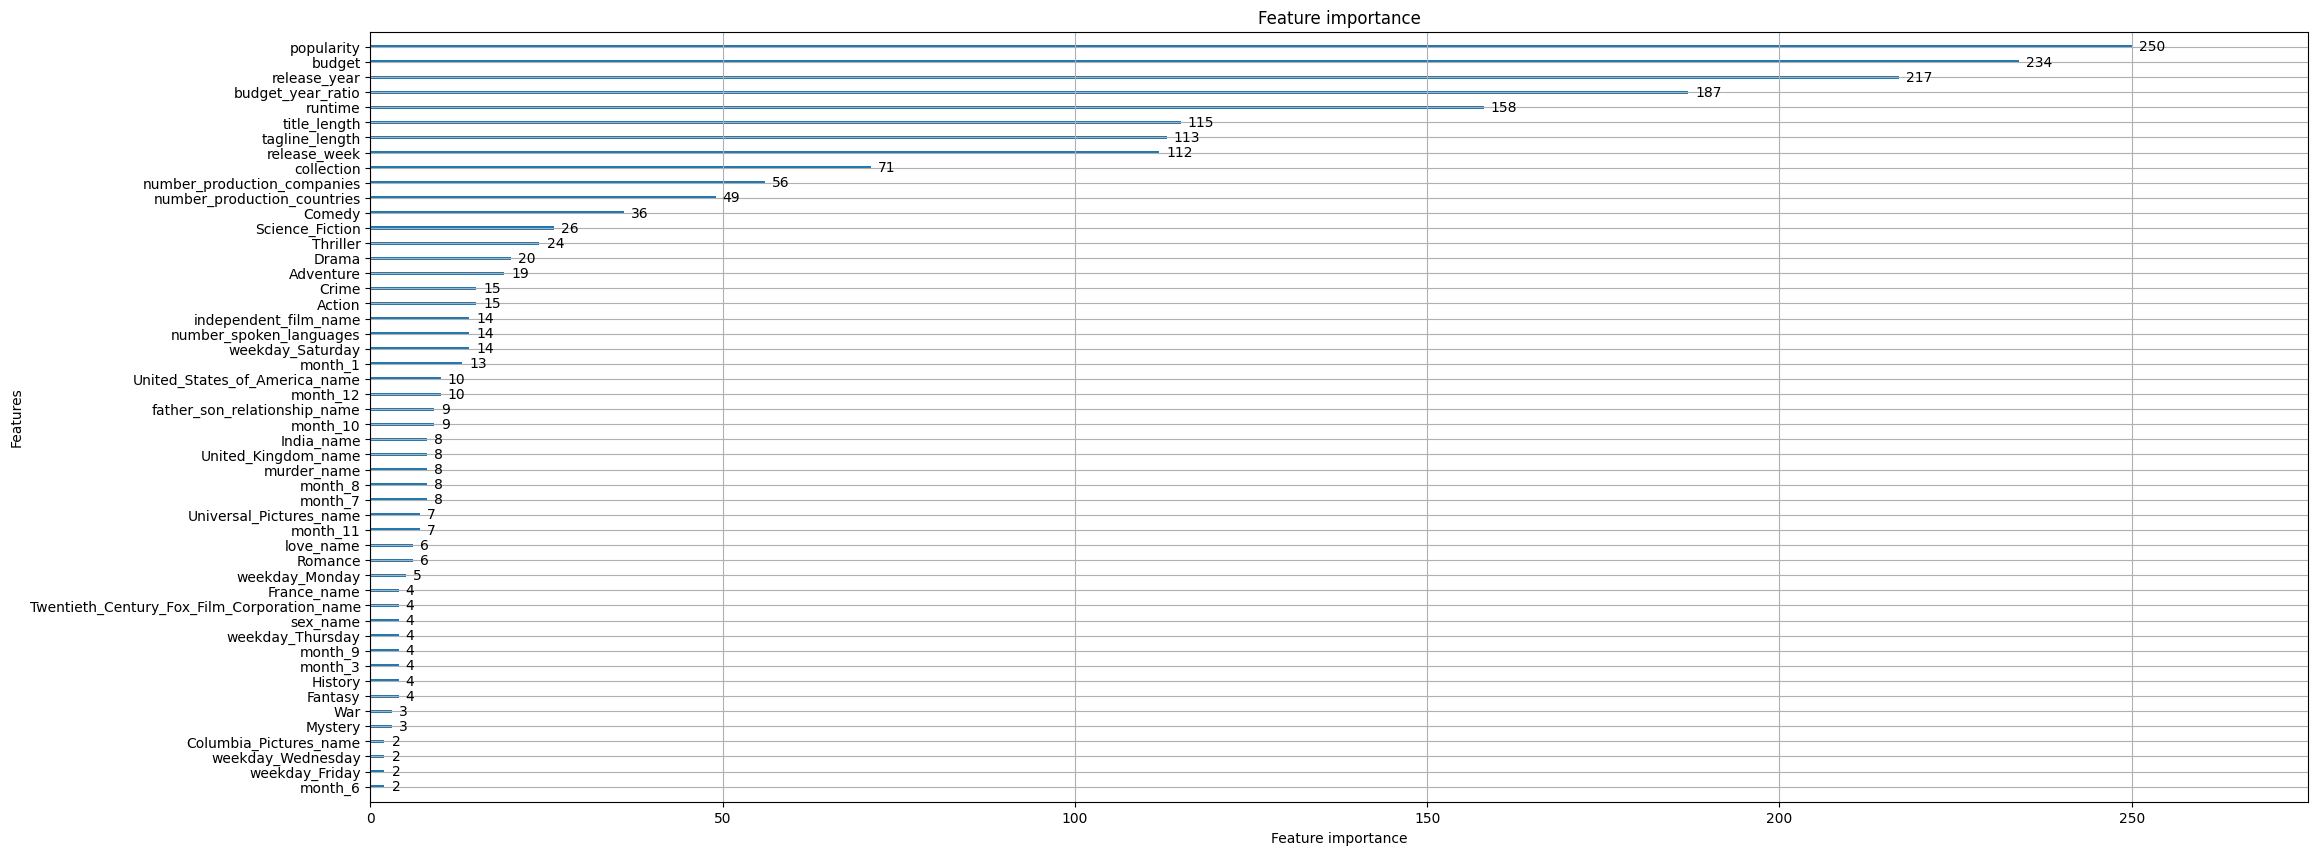

In [47]:
fig, ax = plt.subplots(figsize=(25,10))
lgb.plot_importance(clf_lgb, ax=ax, max_num_features=50);

In [54]:
def flop_success_preds(title_df, test_df, y_pred, train_set=True, label_df=[]):
    '''
    Function to determine flops and successes for dataset
    Args: title_df = dataframe; cleaned dataframe that still contains titles
          test_df = dataframe; dataframe containing test data or other data that should be predicted
          y_pred = numpy array; predicted revenue values
          train_set = boolean; default value: True
          label_df = dataframe; default value is an empty list; can take in dataframe containing revenue variable
    Returns: flop_success_df = dataframe
    '''
    
    # Create dataframe with absolute budget variable and titles
    title_budget_df = title_df[['budget', 'title']]
    
    # Keep only the rows that are in the test_df dataset
    title_budget_df = title_budget_df.loc[test_df.index,:]

    if train_set:
        # Add the actual revenue figures to the dataframe
        title_budget_df = title_budget_df.join(label_df, how='left')
        
    # Add predictions on test_df data set 
    y_pred = pd.DataFrame(np.expm1(scaler_revenue.inverse_transform((y_pred).reshape(-1,1))).astype('int32'), columns=['preds'])

    # Reset index of title_budget_df so that it can be joined with y_pred
    title_budget_df = title_budget_df.reset_index()

    # Add the test_df predictions and actual revenue figures to the new dataframe
    flop_success_df = title_budget_df.join(y_pred)

    # Add profit column for predictions
    flop_success_df['profit_preds'] = (1/2) * flop_success_df['preds'] - flop_success_df['budget']

    # Add columns with boolean values Yes/No depending on whether the movie made a profit
    flop_success_df['cat_profit_preds'] = flop_success_df['profit_preds'].apply(lambda x: 'Yes' if x > 0 else 'No')

    if train_set:
        # Add profit column for actual revenue figures
        flop_success_df['profit_actual'] = (1/2) * flop_success_df['revenue'] - flop_success_df['budget']
        # Add columns with boolean values Yes/No depending on whether the movie made a profit
        flop_success_df['cat_profit_actual'] = flop_success_df['profit_actual'].apply(lambda x: 'Yes' if x > 0 else 'No')
    
    return flop_success_df
    
    

In [49]:
def plot_confusion_matrix(y_test, y_pred):
    '''
    Function to plot a confusion matrix and the accuracy of the predictions
    Args: y_test = numpy array or pandas series; categorical values of actual flop/success
          y_pred = numpy array or pandas series; categorical values of predicted flop/success
    Returns: None
    '''
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred) 

    # Convert confusion matrix to dataframe
    cm_df = pd.DataFrame(cm, index = ['Success', 'Flop'], columns = ['Success', 'Flop'])

    # Plot the confuction matrix
    plt.figure(figsize=(7, 6))
    sb.heatmap(cm_df, annot=True, fmt='d')

    plt.title('Flop and Success Predictions \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                                      y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label');
    
      

In [50]:
# Get dataframe containing predictions on flops and successes of movies
flop_success_X_cross = flop_success_preds(train_features_with_title, X_cross, y_pred, train_set=True, label_df=train_revenue)
flop_success_X_cross


,index,budget,title,revenue,preds,profit_preds,cat_profit_preds,profit_actual,cat_profit_actual
0,780,15000000,Lethal Weapon,120207127,88198924,29099462.0,Yes,45103563.5,Yes
1,581,5000000,The Gift,58978653,8846433,-576783.5,No,24489326.5,Yes
2,1752,30000000,My Sister's Keeper,95714875,40289110,-9855445.0,No,17857437.5,Yes
3,1313,5000000,Nighthawks,19905359,13241654,1620827.0,Yes,4952679.5,Yes
4,1559,24000000,Hitman,99965753,30831262,-8584369.0,No,25982876.5,Yes
...,...,...,...,...,...,...,...,...,...
436,620,6400000,Raanjhanaa,18000000,11167230,-816385.0,No,2600000.0,Yes
437,494,28000000,Kick-Ass 2,60700000,123224664,33612332.0,Yes,2350000.0,Yes
438,59,2000000,Silent House,13101672,2036753,-981623.5,No,4550836.0,Yes
439,71,7000000,Dark Angel,9229401,6372602,-3813699.0,No,-2385299.5,No


In [56]:
# Add confusion matrix for X_train dataset
# plot_confusion_matrix(flop_success_X_train['cat_profit_actual'], flop_success_X_train['cat_profit_preds'])


In [52]:
# Make prediction on test data set
actual_y_test = clf_lgb.predict(test_features_df)

flop_success_test = flop_success_preds(test_title, test_features_df, actual_y_test, train_set=False)
flop_success_test.sort_values('preds', ascending=False)
flop_success_test.to_csv('submission.csv', index=False)

In [58]:
clf_lgb.save_model('model.txt')
